In [545]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.special import factorial
import koreanize_matplotlib 
from math import factorial, exp
from scipy import integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [546]:
file="../data/daegusnow1.csv"
file2="../data/daegusnow2.csv"
file3="../data/daegusnow3.csv"
file4="../data/averageice1.csv"
file5="../data/rainfall.csv"
file6="../data/jangma.csv"
file7="../data/seoulsnowfall.csv"


In [547]:
averagesnowdf=pd.read_csv(file,encoding='utf-8',header=1)
snowfalldf2=pd.read_csv(file2,encoding='utf-8',header=1)
snowseasondf3=pd.read_csv(file3,encoding='utf-8',header=1)
ice4=pd.read_csv(file4,encoding='utf-8')
rainfall=pd.read_csv(file5,encoding='cp949')
jangma=pd.read_csv(file6,encoding='cp949',header=1)
seouls=pd.read_csv(file7)

In [548]:
averagesnowdf=averagesnowdf[2:]


In [549]:
averagesnowdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 2 to 36
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      35 non-null     object 
 1   1월      35 non-null     object 
 2   2월      35 non-null     object 
 3   3월      35 non-null     object 
 4   4월      35 non-null     object 
 5   5월      35 non-null     object 
 6   6월      35 non-null     object 
 7   7월      35 non-null     object 
 8   8월      35 non-null     object 
 9   9월      35 non-null     object 
 10  10월     35 non-null     object 
 11  11월     35 non-null     object 
 12  12월     35 non-null     object 
 13  연합계     35 non-null     float64
 14  순위      35 non-null     float64
dtypes: float64(2), object(13)
memory usage: 4.2+ KB


In [550]:
snowfalldf2

,연도,날짜,지점,기상현상,일 최심신적설(cm)
0,1990,101,대구,눈,-
1,1990,122,대구,눈,-
2,1990,128,대구,눈 진눈깨비,2.4
3,1990,130,대구,눈 진눈깨비,1
4,1990,131,대구,눈,5.8
...,...,...,...,...,...
342,2023,215,대구,눈,-
343,2023,1118,대구,눈,1.1
344,2023,1220,대구,눈,0.6
345,2024,109,대구,눈,-


In [551]:
snowfalldfre=snowfalldf2.replace('-','0')

In [552]:
snowfalldfre

,연도,날짜,지점,기상현상,일 최심신적설(cm)
0,1990,101,대구,눈,0
1,1990,122,대구,눈,0
2,1990,128,대구,눈 진눈깨비,2.4
3,1990,130,대구,눈 진눈깨비,1
4,1990,131,대구,눈,5.8
...,...,...,...,...,...
342,2023,215,대구,눈,0
343,2023,1118,대구,눈,1.1
344,2023,1220,대구,눈,0.6
345,2024,109,대구,눈,0


In [553]:
snowfalldre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연도           347 non-null    int64  
 1   날짜           347 non-null    int64  
 2   지점           347 non-null    object 
 3   기상현상         347 non-null    object 
 4   일 최심신적설(cm)  347 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ KB


In [554]:
snowover0=snowfalldre[snowfalldre['일 최심신적설(cm)']>0]

In [555]:
snowover0  #0이상

,연도,날짜,지점,기상현상,일 최심신적설(cm)
2,1990,128,대구,눈 진눈깨비,2.4
3,1990,130,대구,눈 진눈깨비,1.0
4,1990,131,대구,눈,5.8
5,1990,201,대구,눈,3.6
6,1990,1201,대구,눈,0.9
...,...,...,...,...,...
316,2021,107,대구,눈,0.7
322,2021,302,대구,눈 진눈깨비,1.7
334,2022,1221,대구,눈 진눈깨비 싸락눈,0.8
343,2023,1118,대구,눈,1.1


In [556]:
seoulsnowre=seouls.replace('-','0')


In [557]:
seoulsnowre=seoulsnowre.astype({'일 최심신적설(cm)':'float'})

In [558]:
seoulover0=seoulsnowre[seoulsnowre['일 최심신적설(cm)']>0]

In [559]:
snowseasondf3=snowseasondf3[2:]

In [560]:
snowseasondf3

,연도,봄(3~5월),여름(6~8월),가을(9~11월),겨울(12-2월)
2,1990,0.0,0,0.0,10.0
3,1991,2.0,0,0.0,11.0
4,1992,1.0,0,1.0,9.0
5,1993,2.0,0,1.0,9.0
6,1994,2.0,0,0.0,14.0
7,1995,1.0,0,0.0,10.0
8,1996,2.0,0,2.0,11.0
9,1997,0.0,0,1.0,12.0
10,1998,2.0,0,1.0,3.0
11,1999,2.0,0,1.0,10.0


In [561]:


ice4=ice4[2:]

In [562]:

averagesnowdf.columns

Index(['연도', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월',
       '11월', '12월', '연합계', '순위'],
      dtype='object')

In [563]:

ice4.columns

Index(['연도', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월',
       '11월', '12월', '연합계', '순위'],
      dtype='object')

In [564]:

summary_df=averagesnowdf.copy()
icesummary_df=ice4.copy()
summary_df['snow deviation']=summary_df['연합계']-summary_df['연합계'].mean()
icesummary_df['ice deviation']=icesummary_df['연합계']-icesummary_df['연합계'].mean()
summary_df['product deviation']=summary_df['snow deviation'] * icesummary_df['ice deviation']

In [565]:
summary_df

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계,순위,snow deviation,product deviation
2,1990,5,1,0,0,0,0,0,0,0,0,0,3,9.0,17.0,-0.914286,9.508571
3,1991,2,5,2,0,0,0,0,0,0,0,0,1,10.0,16.0,0.085714,1.680000
4,1992,6,4,1,0,0,0,0,0,0,0,1,2,14.0,6.0,4.085714,6.537143
5,1993,6,1,2,0,0,0,0,0,0,0,1,2,12.0,11.0,2.085714,38.794286
6,1994,3,4,2,0,0,0,0,0,0,0,0,4,13.0,8.0,3.085714,32.708571
7,1995,9,1,1,0,0,0,0,0,0,0,0,4,15.0,3.0,5.085714,99.680000
8,1996,2,4,2,0,0,0,0,0,0,0,2,4,14.0,6.0,4.085714,71.908571
9,1997,4,3,0,0,0,0,0,0,0,0,1,3,11.0,13.0,1.085714,3.908571
10,1998,7,2,2,0,0,0,0,0,0,0,1,0,12.0,11.0,2.085714,-27.948571
11,1999,1,2,2,0,0,0,0,0,0,0,1,3,9.0,17.0,-0.914286,1.280000


In [566]:
summary_df['product deviation'].mean()

64.834

In [567]:
en_snow=np.array(summary_df['연합계'])
en_ice=np.array(icesummary_df['연합계'])

In [568]:
np.corrcoef(en_snow,en_ice)

array([[1.   , 0.654],
       [0.654, 1.   ]])

In [569]:

np.corrcoef(en_snow,en_ice)[1,0]

0.654

In [570]:
#상관계수 0.654 , 양의 상관관계 있음(적설일수와 결빙일수 )

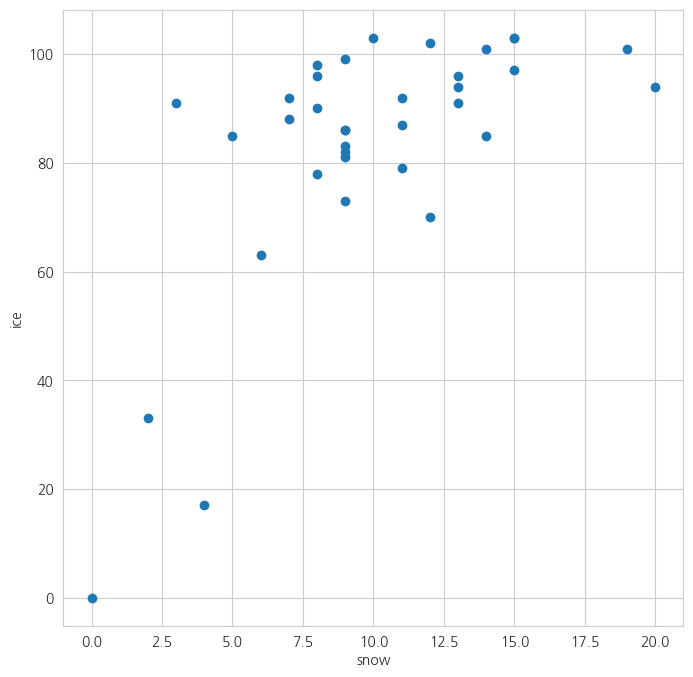

In [571]:
snow_day=np.array(summary_df['연합계'])
ice_day=np.array(icesummary_df['연합계'])

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
#산점도
ax.scatter(snow_day,ice_day)
ax.set_xlabel('snow')
ax.set_ylabel('ice')

plt.show()

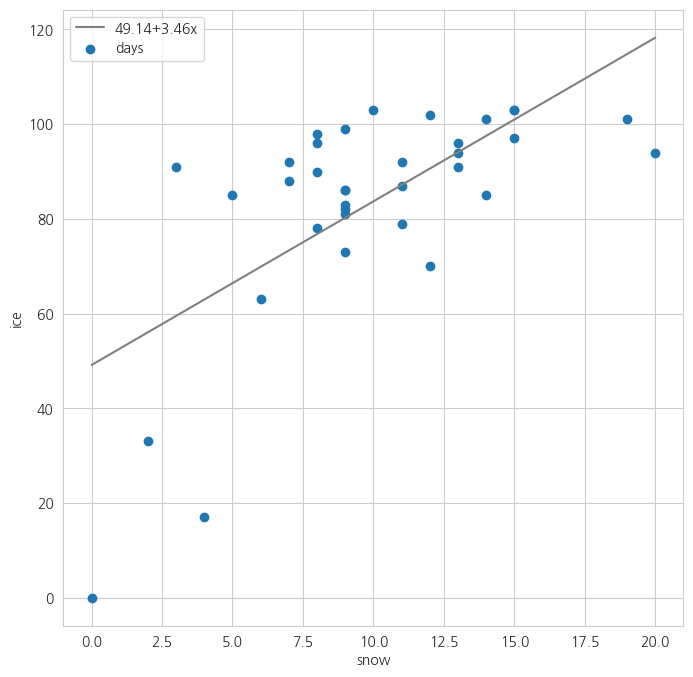

In [572]:

#계수 
poly_fit=np.polyfit(snow_day,ice_day,1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(snow_day.min(),snow_day.max())
#xs에 대응하는 y좌표를 구한다
ys=poly_1d(xs)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.plot(xs,ys,color='gray',
    label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(snow_day,ice_day,label='days')
ax.set_xlabel('snow')
ax.set_ylabel('ice')

#범례표시
ax.legend(loc='upper left')

plt.show()

In [573]:
#강우량 

In [574]:
rainfall

,년월,지점,강수량(mm)
0,Jan-90,143,22.3
1,Feb-90,143,85.5
2,Mar-90,143,45.3
3,Apr-90,143,90.5
4,May-90,143,143.1
...,...,...,...
405,Oct-23,143,5.7
406,Nov-23,143,31.6
407,Dec-23,143,89.9
408,Jan-24,143,21.4


In [575]:
rainfall=rainfall[['년월','강수량(mm)']]

rainfall


,년월,강수량(mm)
0,Jan-90,22.3
1,Feb-90,85.5
2,Mar-90,45.3
3,Apr-90,90.5
4,May-90,143.1
...,...,...
405,Oct-23,5.7
406,Nov-23,31.6
407,Dec-23,89.9
408,Jan-24,21.4


In [576]:
overrain=rainfall[rainfall['강수량(mm)']>=80]

In [577]:
overrain

,년월,강수량(mm)
1,Feb-90,85.5
3,Apr-90,90.5
4,May-90,143.1
5,Jun-90,208.5
6,Jul-90,251.3
...,...,...
401,Jun-23,178.7
402,Jul-23,298.7
403,Aug-23,312.8
404,Sep-23,123.6


In [578]:
superoverrain=rainfall[rainfall['강수량(mm)']>=200]

In [579]:
superoverrain

,년월,강수량(mm)
5,Jun-90,208.5
6,Jul-90,251.3
18,Jul-91,425.3
19,Aug-91,282.5
41,Jun-93,208.4
42,Jul-93,208.5
43,Aug-93,309.1
67,Aug-95,261.0
77,Jun-96,313.2
90,Jul-97,317.9


In [580]:
jangma

,지점번호,지점명,시작일,종료일,장마일수,강수일수,합계강수량
0,184,제주,1990-06-18,1990-07-17,30,19,445.0
1,185,고산,1990-06-18,1990-07-17,30,18,251.4
2,188,성산,1990-06-18,1990-07-17,30,12,411.1
3,189,서귀포,1990-06-18,1990-07-17,30,19,504.3
4,90,속초,1990-06-19,1990-07-27,39,30,412.3
...,...,...,...,...,...,...,...
2239,226,보은,2023-06-26,2023-07-26,31,23,931.7
2240,232,천안,2023-06-26,2023-07-26,31,23,723.1
2241,235,보령,2023-06-26,2023-07-26,31,20,847.8
2242,236,부여,2023-06-26,2023-07-26,31,21,994.9


In [581]:
jangma.columns

Index(['지점번호', '지점명', '시작일', '종료일', '장마일수', '강수일수', '합계강수량'], dtype='object')

In [582]:
jangma=jangma[['지점명','시작일','종료일','장마일수','강수일수','합계강수량']]

In [583]:
jangma

,지점명,시작일,종료일,장마일수,강수일수,합계강수량
0,제주,1990-06-18,1990-07-17,30,19,445.0
1,고산,1990-06-18,1990-07-17,30,18,251.4
2,성산,1990-06-18,1990-07-17,30,12,411.1
3,서귀포,1990-06-18,1990-07-17,30,19,504.3
4,속초,1990-06-19,1990-07-27,39,30,412.3
...,...,...,...,...,...,...
2239,보은,2023-06-26,2023-07-26,31,23,931.7
2240,천안,2023-06-26,2023-07-26,31,23,723.1
2241,보령,2023-06-26,2023-07-26,31,20,847.8
2242,부여,2023-06-26,2023-07-26,31,21,994.9


In [584]:
overjangma=jangma[jangma['합계강수량']>=400]

In [585]:
daeguoverjangma=overjangma[overjangma['지점명']=='대구']

In [586]:
daeguoverjangma

,지점명,시작일,종료일,장마일수,강수일수,합계강수량
74,대구,1991-06-26,1991-08-02,38,27,487.2
466,대구,1997-06-20,1997-07-18,29,13,472.4
880,대구,2003-06-23,2003-07-25,33,22,571.6
1078,대구,2006-06-21,2006-07-29,39,25,587.1
1258,대구,2009-06-21,2009-08-03,44,23,443.6
1390,대구,2011-06-10,2011-07-10,31,15,508.1
2182,대구,2023-06-25,2023-07-26,32,20,454.1


In [587]:
# data=overjangma['합계강수량'].sort_values()
# x=data
# y=norm.pdf(data,np.mean(data),np.std(data))
# plt.plot(x,y)
# plt.title('강수량 400 이상 폭우의 확률 밀도함수')
# plt.xlabel('강수량')


In [588]:
# linestyles=['-','--',':']
# 
# def E(X,g=lambda x:x):
#     x_set,f=X
#     return np.sum([g(x_k) *f(x_k) for x_k in x_set])
# 
# def V(X,g=lambda x:x):
#     x_set,f=X
#     mean=E(X,g)
#     return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])
#     
# def check_prob(X):
#     x_set,f=X
#     prob=np.array([f(x_k) for x_k in x_set])
#     assert np.all(prob>=0),'minus probability'
#     prob_sum=np.round(np.sum(prob),6)
#     assert prob_sum ==1,f'sum of probability{prob_sum}'
#     print(f'expected value {E(X):.4}')
#     print(f'variance {(V(X)):.4}')
#     
# def plot_prob(X):
#     x_set,f=X
#     prob=np.array([f(x_k) for x_k in x_set])
#     
#     fig=plt.figure(figsize=(10,6))
#     ax=fig.add_subplot(111)
#     ax.bar(x_set,prob,label='prob')
#     ax.vlines(E(X),0,1,label='mean')
#     ax.set_xticks(np.append(x_set,E(X)))
#     ax.set_ylim(0,prob.max()*1.2)
#     ax.legend()
#     
#     plt.show()

In [589]:
daeguoverjangma['합계강수량'].mean()


503.443

In [590]:
daeguoverjangma['장마일수'].mean()

35.143

In [591]:
# def Poi(lam):
#     x_set=np.arange(20)
#     def f(x):
#         if x in x_set:
#             return np.power(lam,x)/factorial(x)*np.exp(-lam)
#         else:
#             return 0
#     return x_set,f
            

In [592]:
seoulover0

,연도,날짜,지점,기상현상,일 최심신적설(cm)
1,1990,102,서울,눈,0.1
2,1990,105,서울,눈 진눈깨비 싸락눈,0.6
6,1990,121,서울,눈 가루눈,4.5
7,1990,122,서울,눈,2.3
10,1990,130,서울,눈 진눈깨비 싸락눈,13.4
...,...,...,...,...,...
836,2024,122,서울,눈,2.3
837,2024,205,서울,눈 진눈깨비,3.6
838,2024,206,서울,눈 진눈깨비,0.2
841,2024,215,서울,눈 진눈깨비,1.5


In [593]:
fig=plt.figure

In [594]:
snowover0

,연도,날짜,지점,기상현상,일 최심신적설(cm)
2,1990,128,대구,눈 진눈깨비,2.4
3,1990,130,대구,눈 진눈깨비,1.0
4,1990,131,대구,눈,5.8
5,1990,201,대구,눈,3.6
6,1990,1201,대구,눈,0.9
...,...,...,...,...,...
316,2021,107,대구,눈,0.7
322,2021,302,대구,눈 진눈깨비,1.7
334,2022,1221,대구,눈 진눈깨비 싸락눈,0.8
343,2023,1118,대구,눈,1.1


In [595]:
#정규분포 그려서 비교하기 

In [596]:
# linestyles=['-','--',':']
# 
# def E(X,g=lambda x:x):
#     x_range,f=X
#     def integrand(x):
#         return g(x) * f(x)
#     return integrate.quad(integrand,-np.inf,np.inf)[0]
# def V(X,g=lambda x: x):
#     x_range,f=X
#     mean=E(X,g)
#     def integrand(x):
#         return (g(x)-mean)** 2 * f(x)
#     return integrate.quad(integrand,-np.inf,np.inf)[0]
# def check_prob(X):
#     x_range,f=X
#     f_min=minimize_scalar(f).fun
#     assert f_min >=0,'density function is minus value'
#     prob_sum=np.round(integrate.quad(f,-np.inf,np.inf)[0],6)
#     assert prob_sum==1,f'sum of probability is {prob_sum}'
#     print(f'expected vaue{E(X):.3f}')
#     print(f'variance{V(X):.3f}')
# def plot_prob(X,x_min,x_max):
#     x_range,f=X
#     def F(x):
#         return integrate.quad(f,-np.inf,x)[0]
#     xs=np.linspace(x_min,x_max,100)
#     
#     fig=plt.figure(figsize=(10,6))
#     ax=fig.add_subplot(111)
#     ax.plot(xs,[f(x) for x in xs],label='f(x)',color='gray')
#     ax.plot(xs,[F(x) for x in xs],label='F(X)',ls='--',color='gray')
#     
#     ax.legend()
#     plt.show()

In [597]:
# def N(mu,sigma):
#     x_range=[-np.inf,np.inf]
#     def f(x):
#         return 1/np.sqrt(2*np.pi *sigma**2)*np.exp(-(x-mu)**2 /(2*sigma**2))
#     return x_range,f

{'whiskers': [<matplotlib.lines.Line2D at 0x170922389d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17091bcccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1709159b050>],
 'medians': [<matplotlib.lines.Line2D at 0x1709223ad90>],
 'fliers': [<matplotlib.lines.Line2D at 0x17092239c90>],
 'means': []}

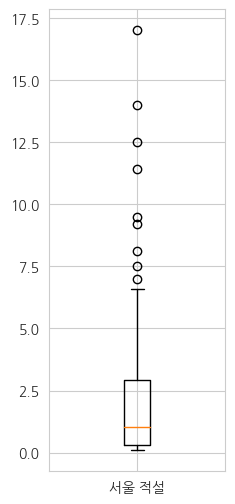

In [598]:
# 품종별 상자 그림 그리기
fig=plt.figure(figsize=(5,6))
ax=fig.add_subplot(121)
ax.boxplot(snowover0['일 최심신적설(cm)'],labels=['서울 적설'])


{'whiskers': [<matplotlib.lines.Line2D at 0x17092297290>,
 'caps': [<matplotlib.lines.Line2D at 0x17091c08850>,
 'boxes': [<matplotlib.lines.Line2D at 0x17092296990>],
 'medians': [<matplotlib.lines.Line2D at 0x170922a1690>],
 'fliers': [<matplotlib.lines.Line2D at 0x170922a1e10>],
 'means': []}

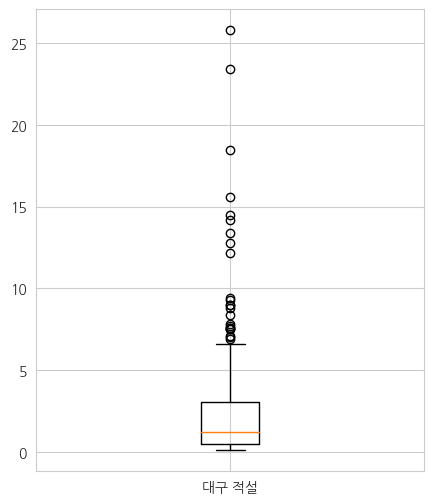

In [599]:
fig=plt.figure(figsize=(5,6))
ax=fig.add_subplot(111)
ax.boxplot(seoulover0['일 최심신적설(cm)'],labels=['대구 적설'])

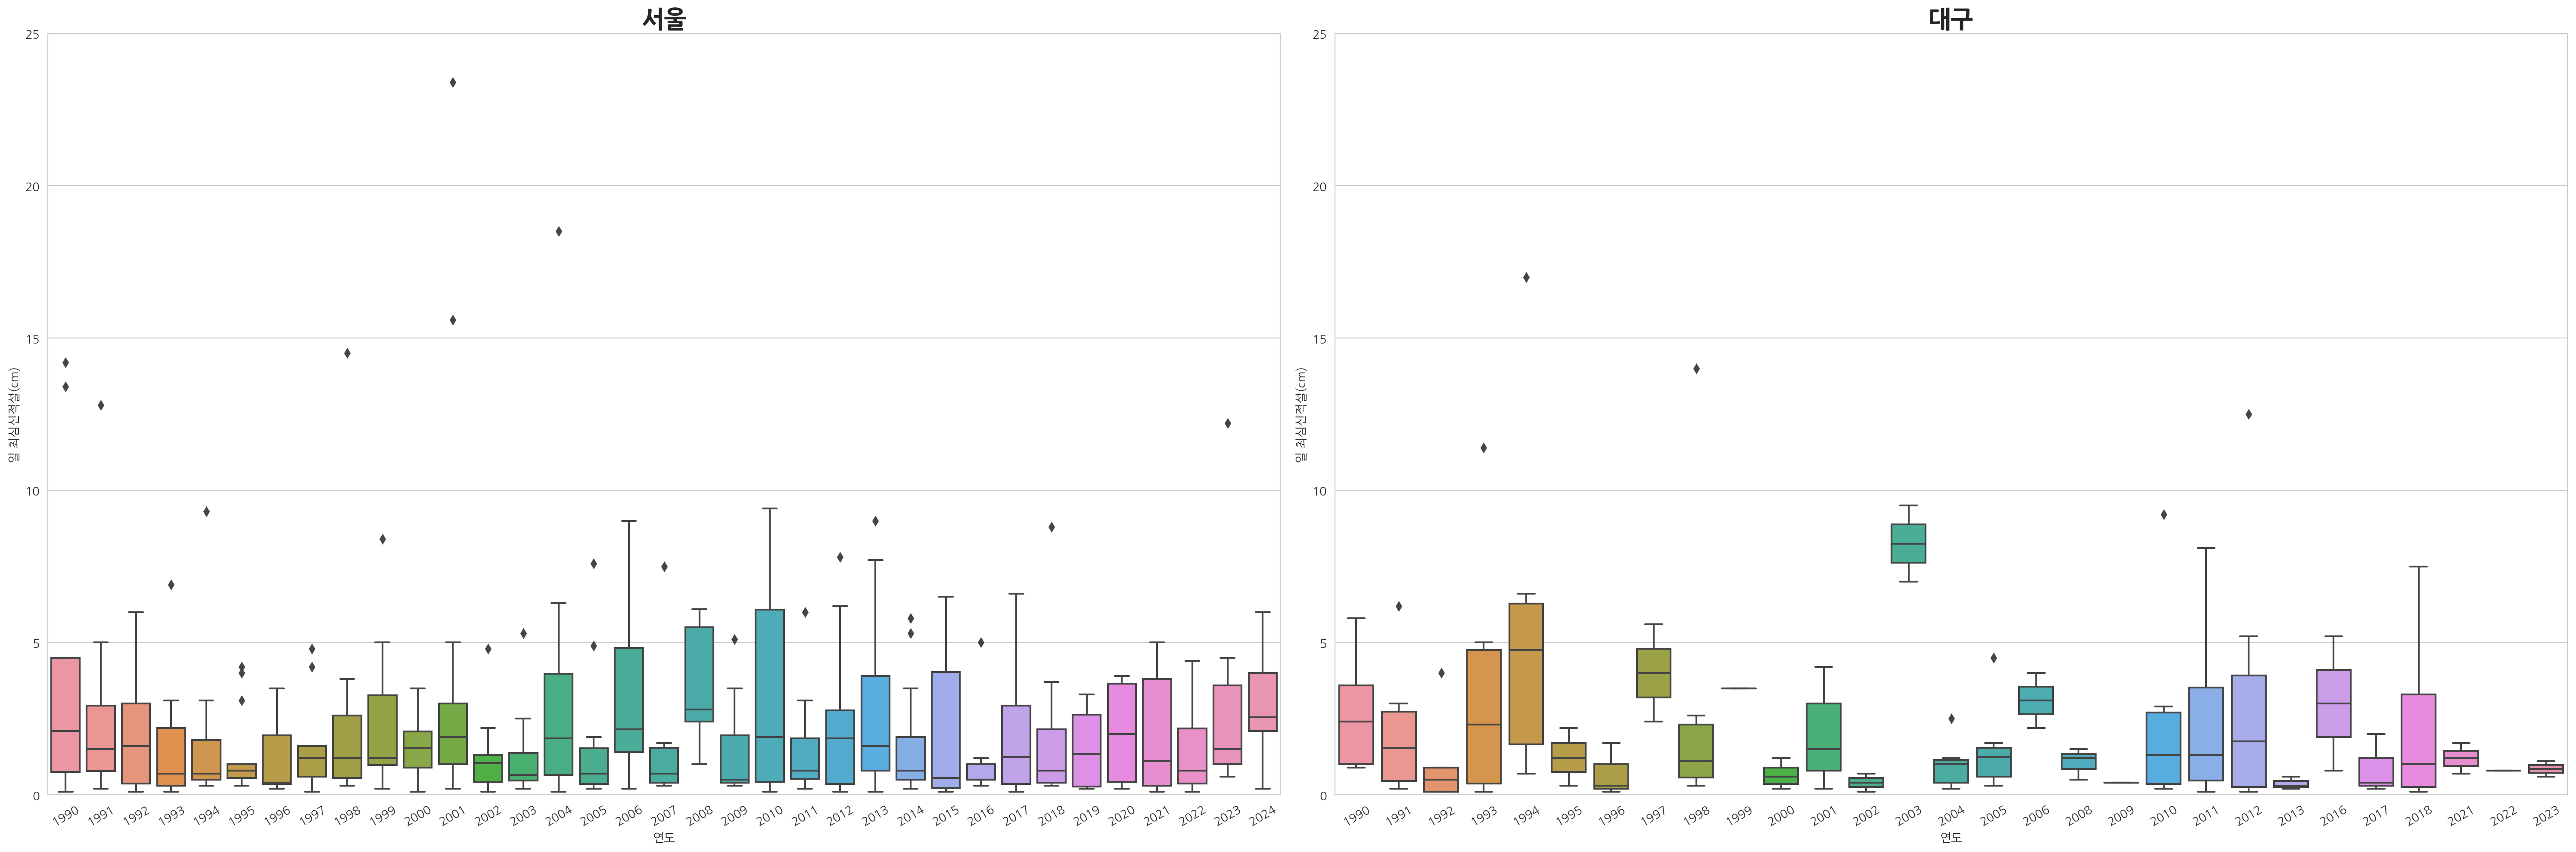

In [621]:

fig, ax = plt.subplots(1,2, figsize=(30,10), dpi = 200)
sns.boxplot(x="연도",y="일 최심신적설(cm)",data=seoulover0,width=0.8, ax = ax[0])
sns.boxplot(x="연도",y="일 최심신적설(cm)",data=snowover0,width=0.8, ax = ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=30)
ax[0].set_ylim(0,25)
ax[0].set_title("서울", fontsize=20, fontweight='bold')
ax[1].set_ylim(0,25)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=30)
ax[1].set_title("대구", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('최심신적설서울대구.png')
plt.show()


<Axes: xlabel='연도', ylabel='일 최심신적설(cm)'>

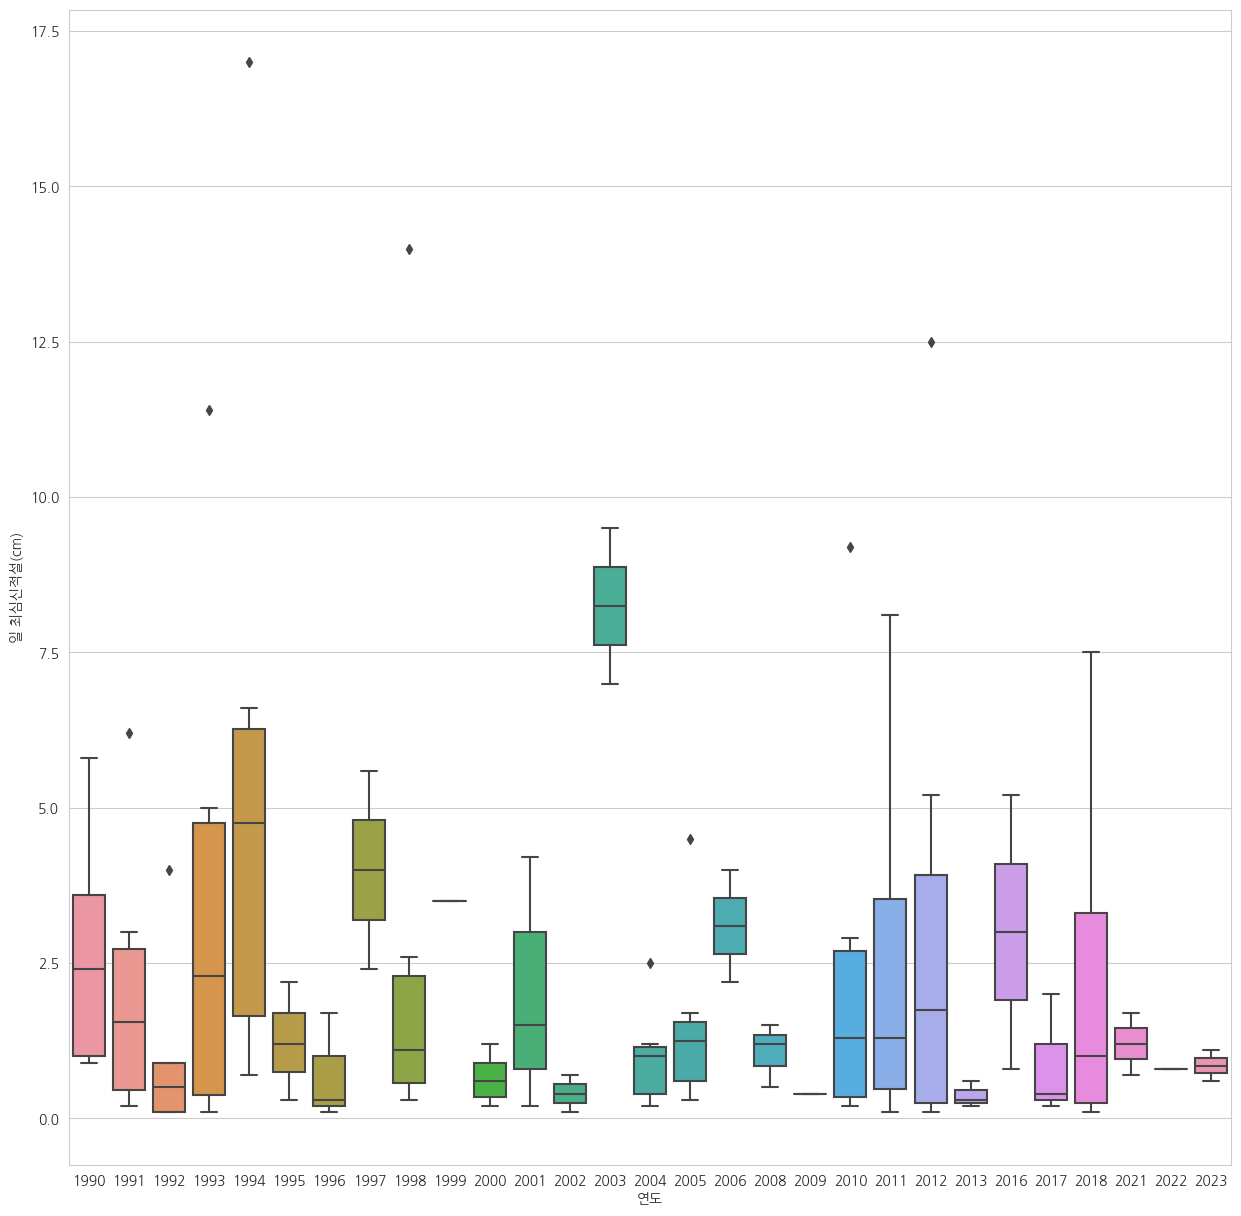

In [601]:
plt.figure(figsize=(15,15))
sns.boxplot(x="연도",y="일 최심신적설(cm)",data=snowover0,width=0.8)

In [601]:
2007->2014,2015->2019,2020->